**TELECOM CUSTOMER CHURN PREDICTION 📈**

**Introduction**

In the highly competitive telecom industry, customer churn is a persistent challenge, with annual rates ranging from 15-25%. As customers freely switch between service providers, retaining loyal clientele has become increasingly critical for telecom companies to maintain their market position and drive profitability.

**The Complexity of Customer Churn**

Customer churn, defined as the discontinuation of the customer-provider relationship, is a multifaceted issue. In an environment flush with options, telecom customers actively seek the best deals, services, and experiences, often with little loyalty to a single brand. This dynamic landscape makes individualized retention efforts arduous, as the sheer volume of customers makes it costly to dedicate substantial resources to each one.

**Unlocking the Power of Predictive Analytics**

However, by harnessing the power of predictive analytics, telecom companies can gain a strategic edge in the battle against churn. By developing a comprehensive understanding of customer behaviors, preferences, and interactions across various touchpoints, these organizations can identify early warning signs of potential churn. This holistic view enables them to proactively target "high-risk" customers with tailored retention strategies, rather than adopting a one-size-fits-all approach.

**Optimizing the Customer Lifecycle**

The key to success in this market lies in the customer itself. By addressing churn, telecom companies can not only preserve their market position but also cultivate growth and prosperity. The more customers they retain, the lower the cost of customer acquisition and the greater the potential for profitability. Therefore, the primary focus for these businesses should be on reducing customer attrition and implementing effective retention strategies that nurture long-term loyalty and engagement.

**Objectives and Analytical Approach**

In this comprehensive exploration, I will delve into the customer churn data, seeking to uncover valuable insights that can inform strategic decision-making. Through a multi-faceted analysis, I aim to address key questions, such as:

  What is the percentage of churned customers versus those who remain active?

  Are there any discernible patterns in churn based on customer demographics or service preferences?

  Which service types and features are the most profitable for the business?

By answering these questions and uncovering meaningful trends, I will provide a practical roadmap for telecom companies to navigate the challenges of customer churn, empowering them to implement targeted retention strategies and foster long-term customer loyalty.

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install catboost

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
# Set the file path
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the DataFrame
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**Breif Explnation of each columns**

**Customer Information**

customerID: A unique identifier for each customer.

gender: The gender of the customer.

SeniorCitizen: Indicates whether the customer is a senior citizen or not.

Partner: Indicates whether the customer has a partner.

Dependents: Indicates whether the customer has dependents.

tenure: The number of months the customer has been with the company.

These variables provide important demographic and account-level information about the customers, which can be useful for understanding how different customer characteristics might relate to churn.


**Services**

PhoneService: Indicates whether the customer has a phone service.

MultipleLines: Indicates whether the customer has multiple phone lines.

InternetService: Indicates the type of internet service the customer has.

OnlineSecurity: Indicates whether the customer has online security service.

OnlineBackup: Indicates whether the customer has online backup service.

DeviceProtection: Indicates whether the customer has device protection service.

TechSupport: Indicates whether the customer has tech support service.

StreamingTV: Indicates whether the customer has streaming TV service.

StreamingMovies: Indicates whether the customer has streaming movies service.

These variables represent the different telecom services the customer has, which can be important for understanding how the customer's service bundle and preferences might impact their likelihood of churning.

**Contract and Billing**

Contract: Indicates the type of contract the customer has (month-to-month, one-year, or two-year).

PaperlessBilling: Indicates whether the customer has paperless billing.

PaymentMethod: Indicates the customer's payment method (electronic check, mailed check, bank transfer, credit card).

MonthlyCharges: The customer's monthly charges for services.

TotalCharges: The customer's total charges over their tenure with the company.

These variables provide information about the customer's billing and contract details, which can be useful for understanding how factors like contract length, payment method, and total charges might influence churn.

**Churn**

Churn: The target variable, indicating whether the customer churned (1) or not (0).

This is the key variable that the analysis is trying to predict, as it represents the outcome of interest - whether the customer discontinued their service with the company.

**DATA EXPLORATION AND MANIPULATION**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Visuliazing Missing value**

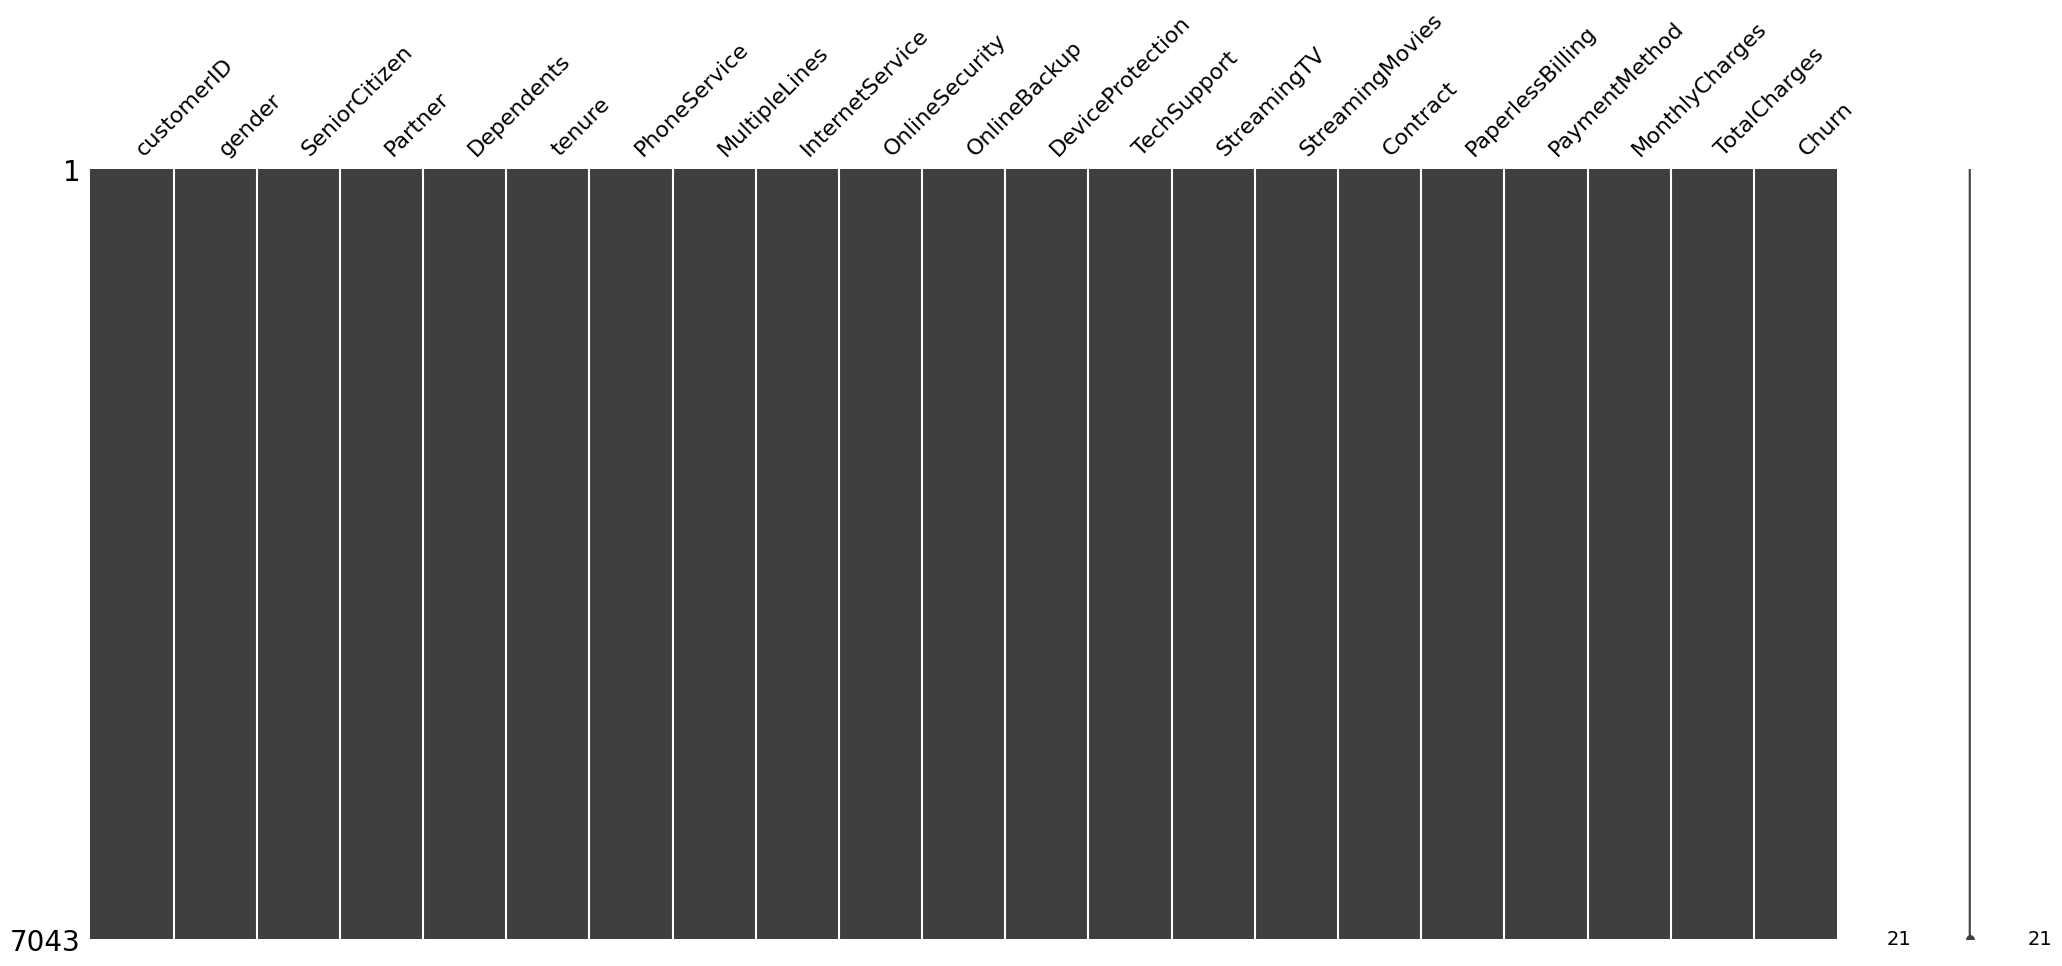

In [10]:
msno.matrix(df);

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**To address the issue of missing values in the TotalCharges column, I opted to impute these gaps with the mean value derived from the existing TotalCharges entries.**

In [14]:
df = df.fillna(df["TotalCharges"].mean())

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**tenure: The number of months the customer has been with the company.**

In [16]:
df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

**From the above the result it note that customer that hae just spend a month as the highest population of 613 and customer with less than a month are just 11**

**

In [17]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [18]:
df_churn = df.groupby(['Churn','tenure'])
(df_churn.get_group(('Yes', 5)))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
275,6432-TWQLB,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.40,401.10,Yes
314,7563-BIUPC,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.60,415.55,Yes
365,1010-DIAUQ,Male,0,No,No,5,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),96.50,492.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6211,4439-JMPMT,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,85.75,470.95,Yes
6232,9681-OXGVC,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,514.00,Yes
6302,9250-WYPLL,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.55,413.65,Yes
6486,2100-BDNSN,Female,0,Yes,No,5,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),67.95,350.30,Yes


In [19]:
df.groupby(by=['Churn','tenure']).size()

Churn  tenure
No     0          11
       1         233
       2         115
       3         106
       4          93
                ... 
Yes    68          9
       69          8
       70         11
       71          6
       72          6
Length: 145, dtype: int64

**Majority of the customer that churn are old customer with 68 days and above**

In [20]:
# SeniorCitizen
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [21]:
# SeniorCitizen mapping them to yes or no
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# InternetService
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [23]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


**Data Visualization**

In [24]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender", pull=[0, 0.1]),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn", pull=[0, 0.1]),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

**What is the percentage of churned customers versus those who remain active?**

**26.5 % of customers switched to other telcom firms.
Customers are 49.5 % female and 50.5 % male**

In [25]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

**Are there any discernible patterns in churn based on customer demographics or service preferences?**

In [26]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

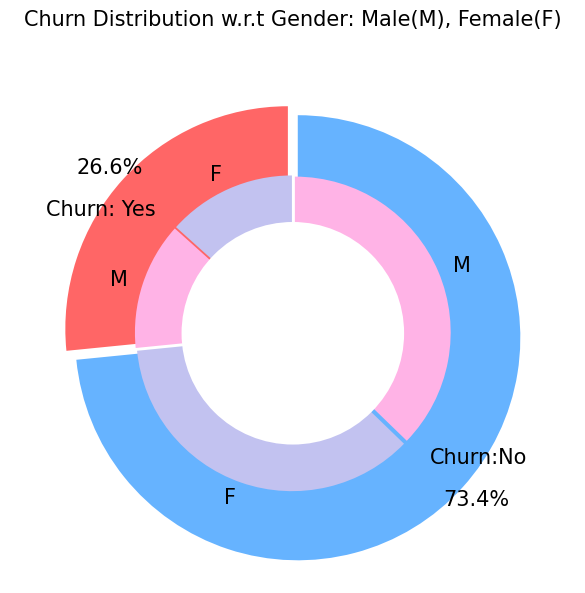

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Churn Distribution w.r.t Gender: Male(M), Female(F)", fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

**The difference in the percentage or count of customers who switched service providers is found to be insignificant. Both male and female customers exhibited similar patterns when considering a transition to another service provider or firm.**

In [28]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Major of the customer that churn are on Month-to-Month contract why the least are on two year bases.**

In [29]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.45, pull=[0, 0.1, 0.1, 0.1])])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [30]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [31]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

**Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service. Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.**

In [32]:
 color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [33]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [34]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**It can be observed that the fraction of senior citizen is very less.**
**Most of the senior citizens churn.**

In [35]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Online security was not the major reason for customer churn in the absence of.**

In [36]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Customers with Paperless Billing are most likely to churn.**

In [37]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

**Majority of the customer that churn uses the phone service. why Very small fraction of customers don't have a phone service.**

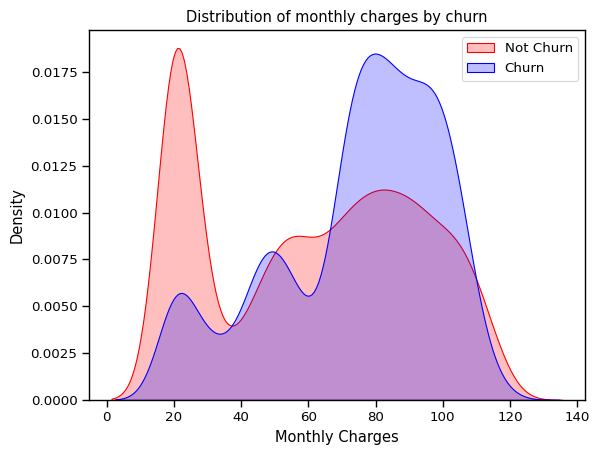

In [38]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

**The Monthly charges is sken to the rigth showing that the high the monthly charge the high the churn rate.**

**There was high not churn rate for the first 20days using the service**

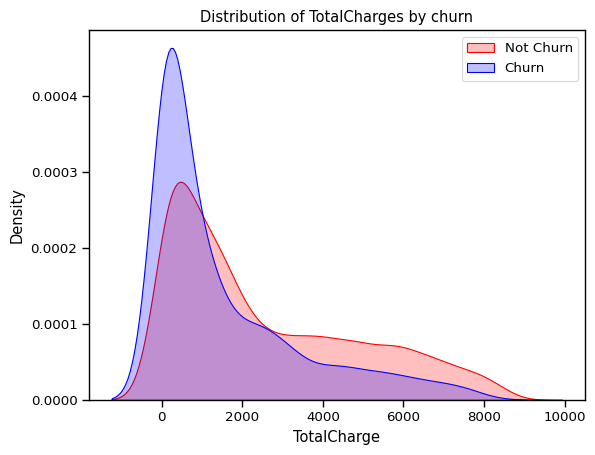

In [39]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('TotalCharge');
ax.set_title('Distribution of TotalCharges by churn');

**There was high churn rate based on the first total charge and gradualy fall as the charge increase.**

In [40]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

**Data Preprocessing**

In [41]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [42]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [44]:
#Drop the customer ID
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [45]:

X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42, stratify=y)

In [47]:
scaler= StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train

array([[-1.00607677, -0.43977565,  1.04176503, ..., -0.5333469 ,
        -0.37146069,  0.65191527],
       [-1.00607677, -0.43977565, -0.95990936, ...,  1.33540156,
        -0.62503158, -0.92060893],
       [ 0.99395993, -0.43977565, -0.95990936, ...,  1.33540156,
        -1.44706533, -0.4628977 ],
       ...,
       [-1.00607677, -0.43977565,  1.04176503, ...,  0.40102733,
         1.47148594,  2.37041828],
       [-1.00607677, -0.43977565,  1.04176503, ..., -0.5333469 ,
        -1.47358254, -0.79394505],
       [ 0.99395993, -0.43977565, -0.95990936, ...,  1.33540156,
        -1.46529591, -0.95753066]])

**Machine Learning Model Evaluations and Predictions**

In [49]:
X_test

array([[-1.00607677, -0.43977565, -0.95990936, ...,  1.33540156,
         0.50857948,  0.87686191],
       [-1.00607677, -0.43977565,  1.04176503, ..., -1.46772113,
        -1.34596843, -0.63815548],
       [ 0.99395993, -0.43977565,  1.04176503, ..., -0.5333469 ,
        -0.36980336, -0.77721421],
       ...,
       [ 0.99395993, -0.43977565, -0.95990936, ...,  0.40102733,
         1.17979655,  0.65966752],
       [-1.00607677, -0.43977565,  1.04176503, ...,  1.33540156,
        -1.12222941, -0.96377188],
       [ 0.99395993, -0.43977565,  1.04176503, ...,  0.40102733,
        -0.62834623, -0.42183705]])

In [50]:
# Define the model
model_rf = RandomForestClassifier()

# Define the hyperparameters we want to tune
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_rf = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rfc = grid_search_rf.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search_rf.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_rfc))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1294
           1       0.68      0.40      0.50       467

    accuracy                           0.79      1761
   macro avg       0.75      0.66      0.68      1761
weighted avg       0.78      0.79      0.77      1761



In [51]:
# Define the model
model_svc = SVC()

# Define the hyperparameters we want to tune
param_grid_svc = {
    'kernel': ['rbf', 'linear', 'poly']
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_svc = GridSearchCV(model_svc, param_grid_svc, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = grid_search_svc.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search_svc.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_svc))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparameters:  {'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.65      0.48      0.55       467

    accuracy                           0.79      1761
   macro avg       0.74      0.69      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [52]:
# Define the model
model_xgb = XGBClassifier()

# Define the hyperparameters we want to tune
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2]
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = grid_search_xgb.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search_xgb.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters:  {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.67      0.48      0.56       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.71      1761
weighted avg       0.79      0.80      0.79      1761



In [53]:
# Define the model
model_cat = CatBoostClassifier()

# Define the hyperparameters we want to tune
param_grid_cat = {
    'depth': [6, 8, 10],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5]
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_cat = GridSearchCV(model_cat, param_grid_cat, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_cat.fit(X_train, y_train)

# Make predictions on the test data
y_pred_cat = grid_search_cat.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search_cat.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_cat))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6808046	total: 49ms	remaining: 4.85s
1:	learn: 0.6696908	total: 51.5ms	remaining: 2.52s
2:	learn: 0.6581363	total: 53.9ms	remaining: 1.74s
3:	learn: 0.6478045	total: 56.2ms	remaining: 1.35s
4:	learn: 0.6379949	total: 58.7ms	remaining: 1.11s
5:	learn: 0.6282710	total: 61.2ms	remaining: 960ms
6:	learn: 0.6194413	total: 63.5ms	remaining: 844ms
7:	learn: 0.6112078	total: 65.5ms	remaining: 753ms
8:	learn: 0.6030483	total: 67.5ms	remaining: 682ms
9:	learn: 0.5952979	total: 70ms	remaining: 630ms
10:	learn: 0.5877179	total: 72.8ms	remaining: 589ms
11:	learn: 0.5808129	total: 74.8ms	remaining: 549ms
12:	learn: 0.5741132	total: 76.9ms	remaining: 514ms
13:	learn: 0.5677141	total: 79.3ms	remaining: 487ms
14:	learn: 0.5612593	total: 81.7ms	remaining: 463ms
15:	learn: 0.5552293	total: 83.8ms	remaining: 440ms
16:	learn: 0.5498775	total: 86.2ms	remaining: 421ms
17:	learn: 0.5443719	total: 88.2ms	remaining: 402ms
18:	learn: 0.539

In [54]:
# Define the model
model_ada = AdaBoostClassifier()

# Define the hyperparameters we want to tune
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_ada = GridSearchCV(model_ada, param_grid_ada, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ada = grid_search_ada.predict(X_test)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", grid_search_ada.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_ada))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters:  {'learning_rate': 0.5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1294
           1       0.64      0.51      0.57       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.78      0.79      0.79      1761



In [55]:
# Define the model
model_lg = LogisticRegression()

# Define the hyperparameters we want to tune
param_grid_lg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_lag = GridSearchCV(model_lg, param_grid_lg, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_lag.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lg = grid_search_lag.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_lag.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_lg))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1294
           1       0.65      0.56      0.60       467

    accuracy                           0.80      1761
   macro avg       0.75      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761



In [56]:
# Define the model
model_gbc = GradientBoostingClassifier()

# Define the hyperparameters we want to tune
param_grid_gbc = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to perform a hyperparameter search
grid_search_gbc = GridSearchCV(model_gbc, param_grid_gbc, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search_gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gbc = grid_search_gbc.predict(X_test)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_gbc.best_params_)

# Print the classification report
print(classification_report(y_test, y_pred_gbc))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters:  {'max_depth': 3, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.49      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [57]:
# Assuming you have a list of feature names in a variable called 'feature_names'
feature_names = df.columns.tolist()

In [58]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100)

# Fit the VotingClassifier to the training data
model_rf.fit(X_train, y_train)

# Get the feature importances
importances = model_rf.feature_importances_

# Print the feature importances
for i, importance in enumerate(importances):
    print(f"{feature_names[i]}: {importance}")

gender: 0.014200022905125674
SeniorCitizen: 0.015025621595508926
Partner: 0.011867169162698116
Dependents: 0.011922306482254025
tenure: 0.15955011757966708
PhoneService: 0.004832906087992436
MultipleLines: 0.018461631750756234
InternetService: 0.04931652283989193
OnlineSecurity: 0.07599315371683302
OnlineBackup: 0.03581666550442501
DeviceProtection: 0.022761664480386044
TechSupport: 0.05956727739709787
StreamingTV: 0.01353465934381797
StreamingMovies: 0.01357770730959266
Contract: 0.14771164574874146
PaperlessBilling: 0.027660276613736035
PaymentMethod: 0.04278646870559356
MonthlyCharges: 0.1371144122889763
TotalCharges: 0.13829977048690556


**From the feature importance it can be seen Total charge produce the highest means that lead to churns. THis cn be important in seeing things that can be worked on to help reduce customer churn**

In [59]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Define the models
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100)
model_svc = SVC(kernel = 'rbf', probability=True)
model_gbc = GradientBoostingClassifier( max_depth = 3, min_samples_split = 10)
model_lg = LogisticRegression(C= 1, penalty = 'l2')
model_ada = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 50)
model_cat = CatBoostClassifier( depth = 6, iterations = 100, l2_leaf_reg = 1)

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', model_rf), ('svc', model_svc), ('gbc', model_gbc), ('lg', model_lg), ('ada', model_ada), ('cat', model_cat)], voting='soft')

# Fit the VotingClassifier to the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_voting = voting_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_voting))

0:	learn: 0.6808046	total: 2.09ms	remaining: 207ms
1:	learn: 0.6696908	total: 4.53ms	remaining: 222ms
2:	learn: 0.6581363	total: 6.67ms	remaining: 216ms
3:	learn: 0.6478045	total: 8.79ms	remaining: 211ms
4:	learn: 0.6379949	total: 11ms	remaining: 209ms
5:	learn: 0.6282710	total: 13.2ms	remaining: 206ms
6:	learn: 0.6194413	total: 15.3ms	remaining: 203ms
7:	learn: 0.6112078	total: 17.4ms	remaining: 200ms
8:	learn: 0.6030483	total: 19.2ms	remaining: 194ms
9:	learn: 0.5952979	total: 21.3ms	remaining: 192ms
10:	learn: 0.5877179	total: 23.5ms	remaining: 190ms
11:	learn: 0.5808129	total: 25.7ms	remaining: 188ms
12:	learn: 0.5741132	total: 27.8ms	remaining: 186ms
13:	learn: 0.5677141	total: 29.9ms	remaining: 183ms
14:	learn: 0.5612593	total: 31.8ms	remaining: 180ms
15:	learn: 0.5552293	total: 33.9ms	remaining: 178ms
16:	learn: 0.5498775	total: 35.7ms	remaining: 174ms
17:	learn: 0.5443719	total: 37.9ms	remaining: 172ms
18:	learn: 0.5391038	total: 40.1ms	remaining: 171ms
19:	learn: 0.5340687	tot

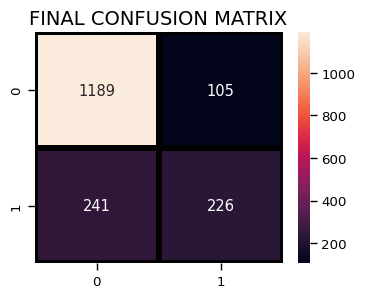

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_voting),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

**An analysis of the confusion matrix reveals that out of a total of 2294 actual non-churn instances, the algorithm correctly predicts 1189 as non-churn and incorrectly classifies 105 as churn. Furthermore, among the 467 actual churn instances, the algorithm accurately predicts 226 as churn and misclassifies 241 as non-churn.

Customer churn poses a significant threat to a firm's profitability, and it is crucial to implement effective strategies to mitigate this issue. To achieve this, companies must develop a deep understanding of their customer base, identifying those at risk of churning and taking proactive measures to enhance their satisfaction.

Enhancing customer service stands as a top priority in addressing customer churn. By fostering customer loyalty through personalized experiences and tailored services, companies can significantly reduce the likelihood of customer churn. Additionally, some firms adopt a proactive approach by surveying customers who have already churned to gain insights into their reasons for leaving, thereby informing future churn prevention strategies.

In summary, a comprehensive understanding of customer needs, coupled with targeted service improvements and personalized experiences, forms the cornerstone of an effective customer churn reduction strategy.**